In [9]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid'])

In [10]:
Nwalker=600;MCSteps=20000
x=[0]*Nwalker
nAccept=0;eSum=0
alphas = np.linspace(0, 5, 20)  
average_energies = []
alpha = 0.5

In [11]:
def initialize():

    for i in range(Nwalker):
        x[i]=2*random()-1

def p(xTrial,x):
    # ratio of rho(xTrial) / rho(x)
    if xTrial > -alpha and xTrial < alpha and x > -alpha and x < alpha:
        return ((alpha**2 - xTrial**2)/(alpha**2 - x**2))**2
    else:
        return 0

def eLocal(x):
    # local energy
    if x > -alpha and x < alpha:
        return x**7/7 - alpha**2*x**5/5 + alpha**4 * x**3/3 + alpha**2 * x - x**3/3
    else:
        return 0

def MetropolisStep():

    global eSum,nAccept
    n=int(random()*Nwalker)
    delta=0.05*(2*random()-1)

    xTrial=x[n]+delta
        # Metropolis test
    w=p(xTrial,x[n])

    if w>=random():
        x[n]=xTrial
        nAccept+=1

    # accumulate energy
    e=eLocal(x[n])
    eSum+=e

def oneMonteCarloStep():
   # perform 'Nwalker' Metropolis steps
   for i in range(Nwalker):
       MetropolisStep()

#...............................................
#.....................END.......................

In [12]:
# Loop over different values of Lambda
for alpha in alphas:
    print("alpha = ", alpha)
    initialize()

    # perform 30% of MCSteps as thermalization steps
    thermSteps = int(0.3 * MCSteps)
    for _ in range(thermSteps):
        oneMonteCarloStep()

    # production steps
    nAccept = 0
    eSum = 0
    for _ in range(MCSteps):
        oneMonteCarloStep()

    # compute and store the average energy
    eAve = eSum / (Nwalker * MCSteps)
    average_energies.append(eAve)

alpha =  0.0
alpha =  0.2631578947368421
alpha =  0.5263157894736842
alpha =  0.7894736842105263
alpha =  1.0526315789473684
alpha =  1.3157894736842104
alpha =  1.5789473684210527
alpha =  1.8421052631578947
alpha =  2.1052631578947367
alpha =  2.3684210526315788
alpha =  2.631578947368421
alpha =  2.894736842105263
alpha =  3.1578947368421053
alpha =  3.4210526315789473
alpha =  3.6842105263157894
alpha =  3.9473684210526314
alpha =  4.2105263157894735
alpha =  4.473684210526316
alpha =  4.7368421052631575
alpha =  5.0


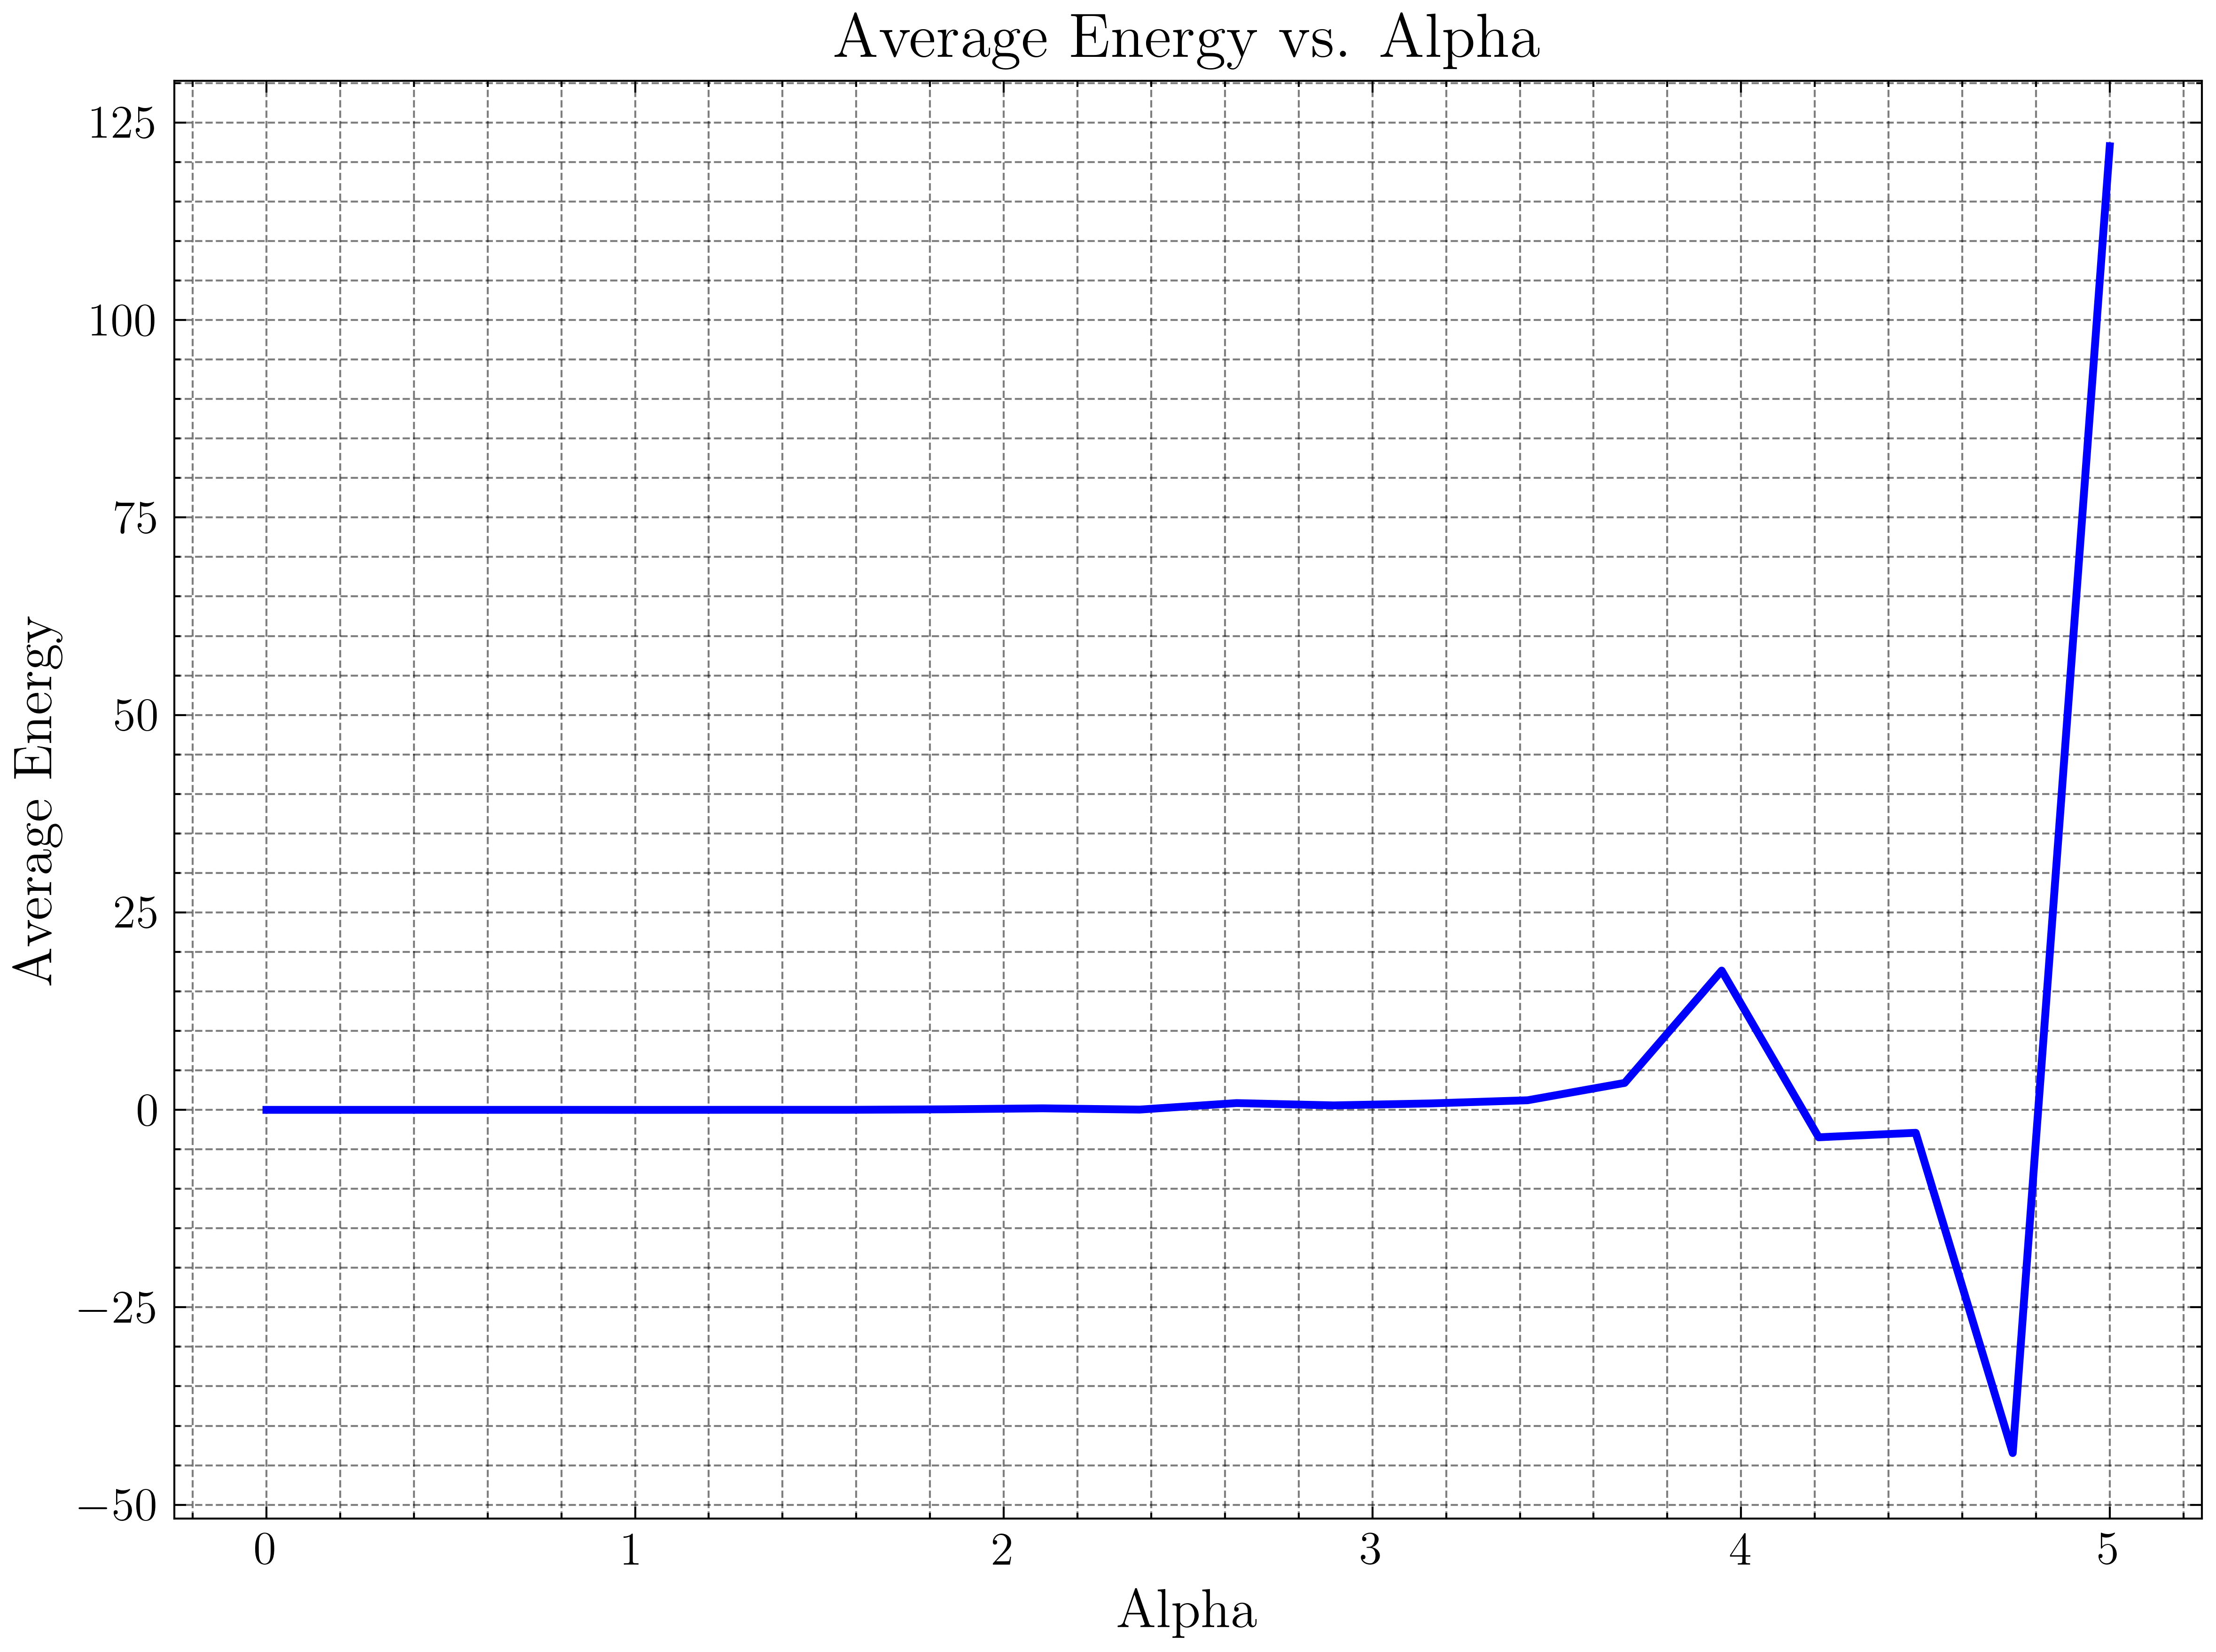

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(alphas, average_energies, color='blue', linewidth=2, linestyle='-')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Average Energy', fontsize=14)
plt.title('Average Energy vs. Alpha', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
min_energy_index = np.argmin(average_energies)
min_energy = average_energies[min_energy_index]
corresponding_alpha = alphas[min_energy_index]

print("Minimum energy:", min_energy)
print("Corresponding alpha value:", corresponding_alpha)

Minimum energy: -43.45235815767859
Corresponding alpha value: 4.7368421052631575
